# 28회차 기출문제 

## 문제 1

**Data description**

-   sex : 성별

-   age : 나이

-   pstatus : 부모와의 동거 유무(T : 동거 o, A : 동거 x)

-   medu : 엄마의 교육수준

    -   0 : none

    -   1 : 초등교육(초등학교)

    -   2 : 5 \~ 9th edu

    -   3 : 중등교육(중학교, 고등학교)

    -   4 : 고등교육(대학, 대학원수준)

-   fedu : 아빠의 교육수준

    -   0 : none

    -   1 : 초등교육(초등학교)

    -   2 : 5 \~ 9th edu(5\~9학년)

    -   3 : 중등교육(중학교, 고등학교)

    -   4 : 고등교육(대학, 대학원수준)

-   guardian : 주보호자

    -   어머니

    -   아버지

    -   기타

-   traveltime : 등하교기간

    -   1 : 15분 이하

    -   2 : 15분 \~ 30분 이하

    -   3 : 30분 \~ 1시간 이하

    -   4 : 1시간 이상

-   studytime : 학습시간

    -   1 : 2시간 이하

    -   2 : 2\~5시간 이하

    -   3 : 5\~10시간 이하

    -   4 : 10시간 이상

-   failure : 학사경고 횟수

-   freetime : 자유시간(1 : 매우 낮음 \~ 5 : 매우 높음)

-   famrel : 가족관계(1 : 매우나쁨 \~ 5 : 매우우수)

-   absences : 결석 유무

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dat = pd.read_csv('problem1.csv')
print(dat.head())

  sex  age pstatus  medu  fedu guardian  traveltime  studytime failures  \
0   F   18       A     4     4   mother           2          2        0   
1   F   17       T     1     1   father           1          2        0   
2   F   15       T     1     1   mother           1          2        3   
3   F   15       T     4     2   mother           1          3        0   
4   F   16       T     3     3   father           1          2        0   

   freetime  famrel absences  
0         3       4       No  
1         3       5       No  
2         3       4       No  
3         2       3       No  
4         3       4       No  


1.  **EDA를 실시하시오(5점).**

In [3]:
print(dat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   pstatus     395 non-null    object
 3   medu        395 non-null    int64 
 4   fedu        395 non-null    int64 
 5   guardian    395 non-null    object
 6   traveltime  395 non-null    int64 
 7   studytime   395 non-null    int64 
 8   failures    395 non-null    object
 9   freetime    395 non-null    int64 
 10  famrel      395 non-null    int64 
 11  absences    395 non-null    object
dtypes: int64(7), object(5)
memory usage: 37.2+ KB
None


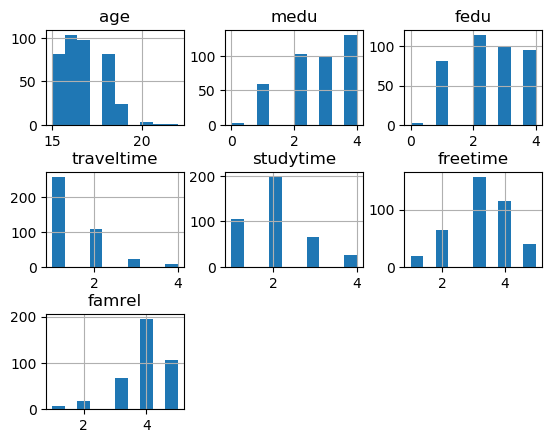

In [4]:
dat.hist();
plt.subplots_adjust(top=0.9, hspace = 0.5, wspace = 0.3);
plt.show();

-   학사 경고 횟수(failures)의 경우 1번인 경우가 가장 많음

-   가족 관계(famrel)는 대체로 우수한 경우가 많음

-   나이대는 20살 이상인 경우가 소수 케이스 존재함

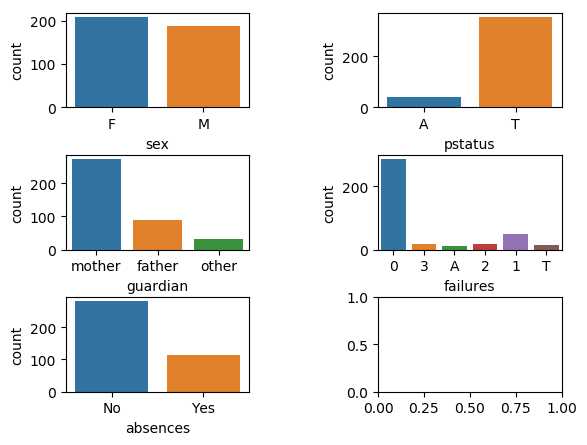

In [5]:
import seaborn as sns
#dat.select_dtypes('object').columns
f, axes = plt.subplots(ncols = 2, nrows = 3)
sns.countplot(dat['sex'], ax = axes[0, 0])
sns.countplot(dat['pstatus'], ax = axes[0, 1])
sns.countplot(dat['guardian'], ax = axes[1, 0])
sns.countplot(dat['failures'], ax = axes[1, 1])
sns.countplot(dat['absences'], ax = axes[2, 0])
plt.subplots_adjust(top=0.9, hspace = 0.5, wspace = 0.7)
plt.show();

-   failures(학사경고횟수)는 수치형 변수이지만 A, T 값이 존재함에 따라 범주형 변수로 인식됨

-   데이터 수집 과정 혹은 코딩상의 문제이므로, 데이터 정합성을 고려하여 삭제 후 수치형으로 변환

In [6]:
dat = dat.loc[~dat.failures.isin(['A', 'T'])]
dat = dat.astype({'failures' : 'int64'})

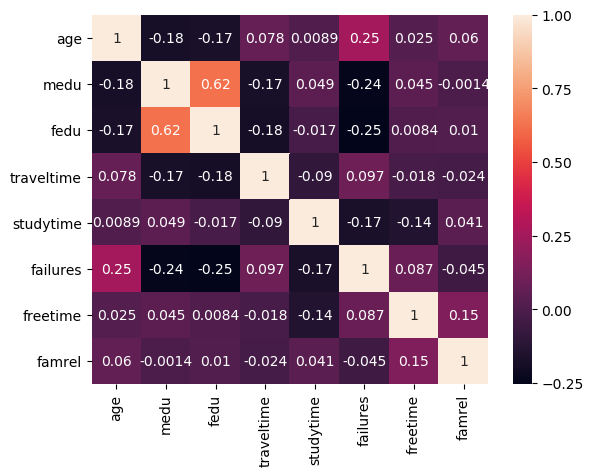

In [7]:
corr = dat.select_dtypes('number').corr()
sns.heatmap(corr, annot = True);
plt.show();

-   아빠의 교육수준(fedu)와 엄마의 교육수준(medu) 간에는 양의 상관관계가 존재함

-   다른 변수의 경우 대체로 상관 관계가 존재하지 않음

2.  **데이터 품질을 살펴보고, 차원축소가 필요한지 검토하시오(5점).**

차원 축소는 변수 간의 중복 정보 제거, 연산 속도 향상, 지도학습 모델 구축시 과적합 방지를 위해 활용할 수 있다. 차원 축소 기법 중 대표적인 방법으로 주성분분석(PCA)이 있으며, 차원 축소의 필요성은 각 변수 간의 상관관계를 보고 판단할 수 있다. EDA 과정에서 확인한 결과 (medu, fedu) 칼럼을 제외하면 변수 간 상관관계가 높지 않다. 따라서 차원 축소 고려하지 않는다.

3.  **위에서 적용한 것이 과적합이라는 전제하에, 이를 해결하기 위한 방법을 2개 제시하고 구현하시오(5점).**

데이터 전처리 이전에 훈련 데이터와 테스트 데이터를 분할한다. 층화 샘플링을 통해 훈련 데이터와 테스트 데이터를 7:3으로 분할한다.

In [8]:
dat = dat.assign(absences = np.where(dat['absences'] == 'Yes', 1, 0))
y = dat['absences']
X = dat.drop(['absences'], axis = 1)

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, stratify = dat['absences'], random_state = 0)

**주성분분석(PCA)**

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

num_columns = train_X.select_dtypes('number').columns

pca_pipe = Pipeline([("scaler", StandardScaler()), 
                     ("PCA", PCA(n_components= 0.8, svd_solver='full'))])
                     
preprocess1 = ColumnTransformer(
    [("num_process", pca_pipe, num_columns)]
)

PCA_train_X = pd.DataFrame(preprocess1.fit_transform(train_X))
#PCA_test_X = pd.DataFrame(preprocess2.transform(test_X))

PCA_train_X.columns = ['PC'+str(i) for i in range(PCA_train_X.shape[1])]
print(PCA_train_X.head())

        PC0       PC1       PC2       PC3       PC4       PC5
0  1.036131 -0.668340  0.115950  0.563613  0.086842  0.464273
1  0.833589  1.525992 -0.133552  2.453935  1.606895 -0.364106
2 -0.253915  0.628491 -0.984591  1.214095  0.847576  0.061925
3 -0.944071 -0.049106 -0.628891 -0.049486  1.042358  1.292357
4  1.002908  0.029393  0.318766  0.415887  0.229856 -0.181580


**오버샘플링**

반응변수에 클래스 불균형이 존재할 경우 다수 범주에 과적합되어 소수 범주에 대한 예측 성능이 떨어지는 문제가 발생할 수 있다. 이를 해결하기 위해 오버샘플링 혹은 언더샘플링을 고려해볼 수 있다. 반응변수(absences)의 경우 빈도 불균형이 존재하므로, 오버샘플링을 고려한다.

In [10]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

oversample = RandomOverSampler(sampling_strategy='minority')
train_X_over, train_y_over = oversample.fit_resample(train_X, train_y)
print(Counter(train_y_over))

Counter({0: 182, 1: 182})


4.  **Random forest, neural network, Lightgbm 알고리즘 적용하여 F1 score를 구하고 성능을 비교하시오(5점).**

In [11]:
from sklearn.preprocessing import OneHotEncoder
cat_columns = train_X.select_dtypes('object').columns

encoding_preprocess = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

preprocess = ColumnTransformer(
    [("num_process", pca_pipe, num_columns), 
    ("cat_process", encoding_preprocess, cat_columns)]
    , remainder='passthrough'
)

**Random forest**

In [12]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, plot_roc_curve, roc_auc_score, roc_curve, f1_score
from sklearn import set_config
set_config(display="diagram")

from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline(
    [
        ("preprocess", preprocess),
        ("oversampling", RandomOverSampler(sampling_strategy='minority')),
        ("classifier", RandomForestClassifier())
    ]
)

RandomForest_param = {'classifier__max_features': np.arange(0.5, 1, 0.1)}
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)

RandomForest_search = GridSearchCV(estimator = pipe_rf, 
                      param_grid = RandomForest_param, 
                      cv = cv,
                      #cv = 5, # KFold 5
                      scoring = 'f1_macro')
RandomForest_search.fit(train_X, train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_process',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('PCA',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
       'freetime', 'famrel']...
                                                                        ('cat_process',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         Index(['sex', 'pstatus', 'guardian'], dtype='object'))])),
                                       ('oversampling',
                                        RandomOverSampler(sampling_strategy='minority')),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_features': array([0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='f1_macro')

In [13]:
print('Random Forest f1 score : ', RandomForest_search.best_score_)

Random Forest f1 score :  0.4811395850284873


**neural network**

In [14]:
from sklearn.neural_network import MLPClassifier

mlp_pipe = Pipeline(
    [
        ("preprocess", preprocess),
        ("oversampling", RandomOverSampler(sampling_strategy='minority')),
        ("classifier", MLPClassifier())
    ]
)

MLP_param = {'classifier__learning_rate_init': np.arange(0.01, 0.2, 0.02)}
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)

MLP_search = GridSearchCV(estimator = mlp_pipe, 
                      param_grid = MLP_param, 
                      cv = cv,
                      #cv = 5, # KFold 5
                      scoring = 'f1_macro')
MLP_search.fit(train_X, train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_process',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('PCA',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
       'freetime', 'famrel']...
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         Index(['sex', 'pstatus', 'guardian'], dtype='object'))])),
                                       ('oversampling',
                                        RandomOverSampler(sampling_strategy='minority')),
                                       ('classifier', MLPClassifier())]),
             param_grid={'classifier__learning_rate_init': array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19])},
             scoring='f1_macro')

In [15]:
print('MLP f1 score : ', MLP_search.best_score_)

MLP f1 score :  0.528194662490504


**Lightgbm**

In [16]:
from lightgbm import LGBMClassifier

pipe_lgb = Pipeline(
    [
        ("preprocess", preprocess),
        ("oversampling", RandomOverSampler(sampling_strategy='minority')),
        ("classifier", LGBMClassifier())
    ]
)
#LGBMClassifier().get_params()
lgb_param = {'classifier__learning_rate': np.arange(0.01, 0.3, 0.05)}
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)

lgb_search = GridSearchCV(estimator = pipe_lgb, 
                      param_grid = lgb_param, 
                      cv = cv,
                      #cv = 5, # KFold 5
                      scoring = 'f1_macro')
lgb_search.fit(train_X, train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_process',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('PCA',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
       'freetime', 'famrel']...
                                                                        ('cat_process',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         Index(['sex', 'pstatus', 'guardian'], dtype='object'))])),
                                       ('oversampling',
                                        RandomOverSampler(sampling_strategy='minority')),
                                       ('classifier', LGBMClassifier())]),
             param_grid={'classifier__learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26])},
             scoring='f1_macro')

In [17]:
print('LGBM f1 score : ', lgb_search.best_score_)

LGBM f1 score :  0.5257487687255693


교차검증 score 기준으로 MLP 모델의 성능이 가장 높다.

In [18]:
pred_mlp = MLP_search.predict(test_X)
print(f1_score(test_y, pred_mlp, average = 'macro'))

0.5743243243243243


최종 테스트 데이터에서의 f1-score = 0.43인 것을 확인할 수 있다.

5.  **하드 보팅 기법을 적용하고, 이전 결과와 비교하시오(5점).**

In [19]:
from sklearn.ensemble import VotingClassifier
rf_best_param = RandomForest_search.best_params_
mlp_best_param = MLP_search.best_params_
lgbm_best_param = lgb_search.best_params_

rf_best_param = list(rf_best_param.values())[0]
mlp_best_param = list(mlp_best_param.values())[0]
lgbm_best_param = list(lgbm_best_param.values())[0]

voting_hard = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(max_features = rf_best_param)),
    ('mlp', MLPClassifier(learning_rate_init = mlp_best_param)),
    ('lgb', LGBMClassifier(learning_rate =  lgbm_best_param))
], voting='hard')

pipe_voting1 = Pipeline(
    [
        ("preprocess", preprocess),
        ("oversampling", RandomOverSampler(sampling_strategy='minority')),
        ("classifier", voting_hard)
    ]
)

pipe_voting1.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_process',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('PCA',
                                                                   PCA(n_components=0.8,
                                                                       svd_solver='full'))]),
                                                  Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
       'freetime', 'famrel'],
      dtype='object')),
                                                 ('cat_process',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHot...
                                                                                 sparse=False))]),
                                                  Index(['sex', 'pstatus', 'guardian'], dtype='object'))])),
                ('oversampling',
                 RandomOverSampler(sampling_strategy='minority')),
                ('classifier',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(max_features=0.8999999999999999)),
                                              ('mlp',
                                               MLPClassifier(learning_rate_init=0.16999999999999998)),
                                              ('lgb',
                                               LGBMClassifier(learning_rate=0.26))]))])

In [20]:
pred_voting = pipe_voting1.predict(test_X)
print(f1_score(test_y, pred_voting, average = 'macro'))

0.457523136113133


최종 테스트 데이터에서의 f1-score = 0.50인 것을 확인할 수 있다. 하드 보팅 기법을 적용했을 때, 모델 성능이 개선된다.

6.  **추가적인 처리 방안이 있으면 제시하시오(5점).**

-   변수 선택

불필요한 변수는 모델의 복잡성을 증가시킬 수 있으므로, 변수 선택 방법을 통해 모델을 단순화할 수 있다. Voting 모델의 경우 Permutation importance 방식을 통해 변수 중요도를 산출할 수 있다.

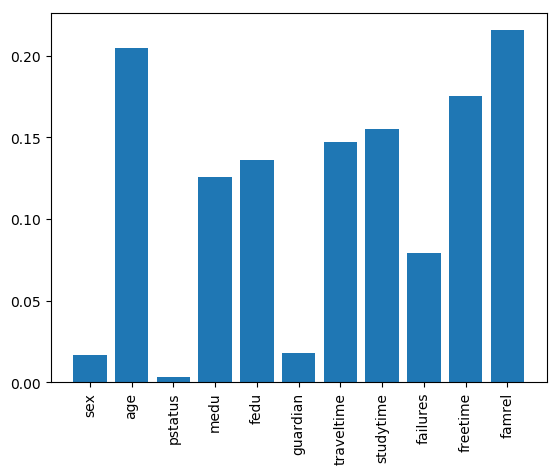

In [21]:
from sklearn.inspection import permutation_importance
feature_importances = permutation_importance(
    pipe_voting1, train_X, train_y, n_repeats=10, random_state=42
)

import matplotlib.pyplot as plt

#plt.clf()
features = train_X.columns
importances = feature_importances.importances_mean

plt.bar(features, importances); 
plt.xticks(rotation=90);
plt.show();

변수 중요도를 기준으로 famrel, studytime, traveltime, age 변수를 선택할 수 있다.

7.  **학교 운영시스템에 적용한다면 검토사항은 무엇이 있을지 제시하시오(5점).**

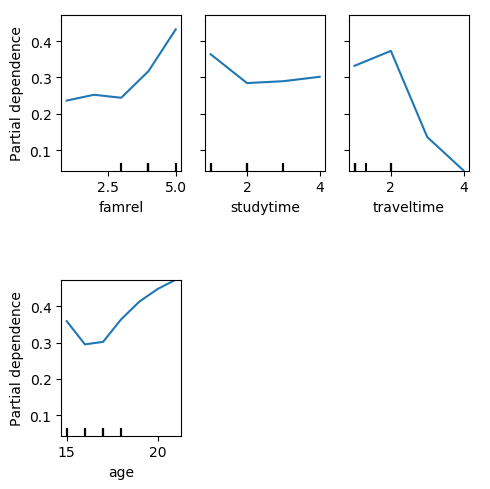

In [22]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

selected_columns = ['famrel', 'studytime', 'traveltime', 'age']

fig, ax = plt.subplots(figsize=(5, 5))
plt.subplots_adjust(top=0.9, hspace=0.7)
plot_partial_dependence(estimator=MLP_search, 
                        X=train_X, 
                        features=selected_columns, # 관심변수 
                        percentiles=(0, 1), # 최소, 최대 
                        ax=ax);

plt.tight_layout();                        
plt.show();

-   가족관계가 좋을수록, 결석할 확률은 높아지는 경향이 있다.

    -   해당 결과는 데이터 수집 과정에 대해 조사해볼 필요가 있어보인다.

-   공부 시간이 늘어날수록, 결석할 확률은 낮아지는 경향이 있다.

    -   최소 공부 시간을 확보할 수 있는 다양한 교육 프로그램 운영이 필요하다.

-   나이가 들어갈수록, 결석할 확률은 높아지는 경향이 있다.

    -   저학년의 경우 학교에 적응하는 시간이 필요하므로, 학교를 성실히 다닐 수 있도록, 조기 교육이 필요해보인다.

## 문제 2

**Data description**

-   **customer_id :** 고객의 고유 ID

-   **age : 나이**

-   **income** : 고객의 월 수입

-   **email_open_rate** : 고객이 이메일을 연 비율

-   **campaign_type : 마케팅 캠페인 타입**

    -   'Sale', 'Discount', 'NewArrival'

-   **clicks : 고객이 마케팅 캠페인에서 클릭한 횟수(target)**

In [23]:
dat = pd.read_csv('problem2.csv')

1.  **데이터 전처리를 수행하시오.**

In [24]:
print(dat['campaign_type'].value_counts())

NewArrival    72
Discount      66
Sale          62
Name: campaign_type, dtype: int64


campaign_type 변수에 \@#!특수 문자가 존재하므로, 제거한다.

In [25]:
import re
dat['campaign_type'] = dat['campaign_type'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [26]:
print(dat['campaign_type'].value_counts())

NewArrival    72
Discount      66
Sale          62
Name: campaign_type, dtype: int64


단순 인덱스 칼럼인 ...1, customer_id 칼럼 경우 정보량이 없으므로 제거한다.

In [27]:
adat = dat.drop(columns=['Unnamed: 0', 'customer_id'])

2.  **캠페인 타입이 'Sale'인지 여부에 따라 새로운 파생변수를 생성하시오.**

In [28]:
dat['is_sale'] = np.where(dat['campaign_type'] == 'Sale', 1, 0)

3.  **포아송 회귀 모델을 적합하고, 모델의 통계적 유의성을 검토하시오.**

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

poisson_model = smf.glm(formula='clicks ~ age + income + email_open_rate + C(is_sale)', 
                        data=dat, 
                        family=sm.families.Poisson()).fit()

In [30]:
from scipy import stats
residual_deviance = poisson_model.deviance
df_resid = poisson_model.df_resid
p_value = stats.chi2.sf(residual_deviance, df_resid) # CDF 계산 
print(f"p-value: {p_value}")

p-value: 0.034744672101265306


-   $H_0$ : 단순 모델(상수항만 포함된 모델)이 데이터에 적합하다.
-   $H_1$ : 현재 모델이 데이터에 적합하다.

유의수준 5%에서 p-value가 작으므로 귀무가설을 기각한다. 따라서 현재 모델이 단순 모델에 비해 데이터에 더 적합하다.

4.  **회귀 계수의 통계적 유의성을 확인하고, 해석하시오.**

In [31]:
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 clicks   No. Observations:                  200
Model:                            GLM   Df Residuals:                      195
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -451.55
Date:                Mon, 09 Jun 2025   Deviance:                       232.34
Time:                        07:03:53   Pearson chi2:                     222.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007820
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.3969      0.329     

-   $H0$: 나이의 회귀계수는 0이다.

-   $H1$: 나이의 회귀계수는 0이 아니다.



유의수준 5%에서 모든 설명변수의 p-value가 크므로 귀무가설을 기각할 수 없다. 따라서 나이는 click 칼럼과 통계적으로 유의미한 관계가 없다.

나이와 마찬가지로 income, email_open_rate, is_sale 변수는 click 칼럼과 통계적으로 유의미한 관계가 없다.

5.  **Random forest 모델을 적합하고, 포아송 회귀와 모델 성능을 비교하시오(평가 지표 : RMSE).**

모델 평가를 위해 훈련 데이터와 테스트 데이터를 분할한다. 단순 무작위 샘플링을 통해 훈련 데이터와 테스트 데이터를 7:3으로 분할한다.

In [32]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dat, test_size=0.3, random_state=1)

X_train = train[['age', 'income', 'email_open_rate', 'is_sale']]
y_train = train['clicks']
X_test = test[['age', 'income', 'email_open_rate', 'is_sale']]
y_test = test['clicks']

**poisson regression**

In [33]:
pred_pois = poisson_model.predict(X_test)

**Random forest**

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error
mse_pois = mean_squared_error(y_test, pred_pois)
mse_rf = mean_squared_error(y_test, pred_rf)
print(f"MSE for Poisson Regression: {mse_pois}")
print(f"MSE for Random Forest: {mse_rf}")

MSE for Poisson Regression: 7.405301736891148
MSE for Random Forest: 8.260128333333332


포아송 회귀 모델의 모델 성능이 더 높다.

## 문제 3

In [36]:
dat = pd.read_csv('problem3.csv')

1.  **시간별, 제조사별 불량률 데이터로 생존분석을 시행한 후 25, 30, 35개월 후의 불량률을 계산하시오(5점).**

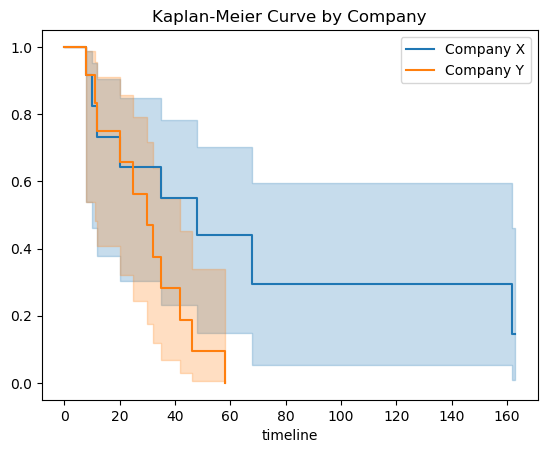

In [37]:
from lifelines import KaplanMeierFitter
kmf_X = KaplanMeierFitter()
kmf_Y = KaplanMeierFitter()

company_X = dat.loc[dat.company == 'X']
company_Y = dat.loc[dat.company == 'Y']

kmf_X.fit(durations=company_X['time'], event_observed=company_X['status'], label='Company X')
# 제조사 B에 대해 생존 함수 적합
kmf_Y.fit(durations=company_Y['time'], event_observed=company_Y['status'], label='Company Y')

# 그래프 그리기
kmf_X.plot_survival_function();
kmf_Y.plot_survival_function();
plt.title('Kaplan-Meier Curve by Company');
plt.show();

25, 30, 35 시점에 생존 확률은 다음과 같다.

In [38]:
times = [25, 30, 35]
survival_probs_X = kmf_X.predict(times)
survival_probs_Y = kmf_Y.predict(times)

print('company X : \n', survival_probs_X)
print('company Y : \n', survival_probs_Y)

company X : 
 25    0.641667
30    0.641667
35    0.550000
Name: Company X, dtype: float64
company Y : 
 25    0.56250
30    0.46875
35    0.28125
Name: Company Y, dtype: float64


생존 확률을 불량률로 변환한다.

In [39]:
failure_rates_X = 1 - survival_probs_X
failure_rates_Y = 1 - survival_probs_Y

제조사 X에 대한 불량률은 다음과 같다.

In [40]:
print(f"Company X의 불량률 \n: {failure_rates_X}")

Company X의 불량률 
: 25    0.358333
30    0.358333
35    0.450000
Name: Company X, dtype: float64


제조사 Y에 대한 불량률은 다음과 같다.

In [41]:
print(f"Company Y의 불량률 \n: {failure_rates_Y}")

Company Y의 불량률 
: 25    0.43750
30    0.53125
35    0.71875
Name: Company Y, dtype: float64


2.  **로그 순위법으로 제조사별 불량률의 차이가 있는지 검정하시오(5점).**

로그 순위법은 두 생존 곡선이 차이가 있는지 검정하는 비모수적 방법입니다. `survdiff` 함수에 구현되어 있으며, 유의 수준 0.05에서 검정을 실시하는 방법입니다.

-   $H_0$: 두 생존 함수는 동일하다. $S_X(t) = S_Y(t)$ for all $t$
-   $H_1$: 두 생존 함수는 같지 않다. $S_X(t) \neq S_Y(t)$ for some $t$

In [42]:
from lifelines.statistics import logrank_test
results = logrank_test(company_X['time'], company_Y['time'], 
                       event_observed_A=company_X['status'], 
                       event_observed_B=company_Y['status'])

p_value = results.p_value
print(f"Log-rank test p-value: {p_value}")

Log-rank test p-value: 0.05629401724877397


유의수준 0.05에서 p-value=0.056으로 크므로, 귀무가설을 기각할 수 없다. 따라서, 제조사 A, B의 불량률에는 통계적으로 유의미한 차이가 없습니다.

## 문제 4

별도의 데이터 없음

**다음 표는 슬통 Food의 신제품 홍보 설문 조사 결과이다. 시식 행사에 참여한 고객들의 시식 후 구매 의사의 변화가 있는지 없는지 검정하시오(10점).**

| 구분         | 시식 후 있음 | 시식 후 없음 |
|--------------|--------------|--------------|
| 시식 전 있음 | 23           | 7            |
| 시식 전 없음 | 18           | 12           |

-   $H_0$ : 시식 전후 구매의사에는 변화가 없다.
-   $H_1$ : 시식 전후 구매의사에는 변화가 있다.

In [43]:
from statsmodels.stats.contingency_tables import mcnemar

tt = np.array([[23, 18],
               [7, 12]])

result = mcnemar(tt, exact=False, correction=False)
print(f"McNemar test statistic: {result.statistic}")
print(f"p-value: {result.pvalue}")

McNemar test statistic: 4.84
p-value: 0.027806895026997264


유의수준 5%에서 p-value=0.02781로 작으므로, 귀무가설을 기각할 수 있다. 따라서 시식 전후 구매 의사에 변화가 있다는 통계적 근거가 충분하다.

## 문제 5

**두 개의 고등학교 학생들의 시험 표준 점수가 들어있습니다. 각 학생의 성적이 서로 독립적이라고 가정할 때, 두 학교의 표준 점수 분포에 유의미한 차이가 있는지 검정하시오(10점).**

In [44]:
dat = pd.read_csv('problem5.csv')

In [45]:
dat.isna().sum()

school_A    12
school_B     0
dtype: int64

school_A에 결측치가 12개 존재한다. school_A의 결측치를 삭제한다. 

In [46]:
score_A = dat['school_A'].dropna().values
score_B = dat['school_B'].values

-   $H_0$ : 두 학교의 점수 분포는 같다.
-   $H_1$ : 두 학교의 점수 분포는 다르다.

In [47]:
from scipy.stats import ks_2samp
statistic, p_value = ks_2samp(score_A, score_B)
print(f"KS Test statistic: {statistic}")
print(f"p-value: {p_value}")

KS Test statistic: 0.2916666666666667
p-value: 0.4851647544731361


유의수준 5%에서 p-value=0.485 크므로, 귀무가설을 기각할 수 없다. 따라서 두 학교의 점수 분포는 같은 분포에서 나왔다고 할 수 있다.

## 문제 6

슬통 병원 환자들의 건강 검진 정보가 들어있습니다. 다음의 물음에 답하시오.

In [48]:
dat = pd.read_csv('problem6.csv')

1.  **몸무게를 제어했을 때, 나이와 콜레스테롤 상관계수 및 유의확률을 구하라(5점).**

In [49]:
import pingouin as pg
result = pg.partial_corr(data=dat, x='AGE_GROUP', y='TOT_CHOLE', covar='WEIGHT')
print(result)

            n         r          CI95%        r2    adj_r2     p-val   BF10  \
pearson  4098  0.016787  [-0.01, 0.05]  0.000282 -0.000206  0.282639  0.035   

            power  
pearson  0.189149  


-   $H_0$ : 몸무게를 통제했을 때, 나이와 콜레스테롤의 상관계수는 0이다.

-   $H_1$ : 몸무게를 통제했을 때, 나이와 콜레스테롤의 상관계수는 0이 아니다.

편상관계수는 0.0167, p-value는 0.2826이다.

2.  **유의수준 0.05 하에서 통계적 의사결정을 수행하라(5점).**

유의수준 5%에서 p-value=0.2826로 크므로, 귀무가설을 기각할 수 없다. 따라서 몸무게를 통제했을 때, 나이와 콜레스테롤 간에는 통계적으로 유의미한 관계가 없다.